# Deep Learning Lab - 2. Convolutional Neural Network

This lab is for introducting Convolutional Neural Networks using TensorFlow and Keras API.

**A Convolutional Neural Network (CNN)** is a type of deep learning model specifically designed for processing structured grid data, such as images. It uses convolutional layers to automatically extract features like edges, textures, and patterns, which are critical for tasks like image recognition and classification.

steps:

1. load the dataset and split it into train and validation datasets
2. define our CNN model using Keras with TensorFlow as backend
3. compile our model by specifying loss function and optimizer
4. fit our model to the train dataset
5. evaluate our model on the validation dataset

## Step 0: Install dependencies
In this lab, we use [TensorFlow](https://www.tensorflow.org/). TensorFlow is an open-source platform developed by Google for machine learning and deep learning. if you are using Kaggle or Google Colab environment, you can use TensorFlow without installing that but if you want to run your code locally you can install Tensorflow by using the following command with pip:

In [52]:
! pip install tensorflow==2.16.1

In [53]:
import tensorflow as tf
print(tf.version.VERSION)

2.16.1


## Step 1: Data Preparation

We use and load [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10) Dataset. CIFAR10 is a set of 60,000 small color images, each 32x32 pixels, grouped into 10 categories like airplanes, cars, and animals. 

Tensorflow internally has some methods for support various prominent datasets such MNIST, CIFAR10 and etc.

In [54]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Each pixel in these images has an unsigned integer value ranging from 0 to 255, representing the intensity of the pixel. To reduce computational complexity and improve model accuracy, these pixel values are normalized by scaling them to a range between 0 and 1. This step is called a **Normalization** step.

In [55]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## Step 2: Define the Model
* Models in Keras are defined as a sequence of layers. We create a `Sequential` model and add layers one at a time. The first thing to get right is to ensure the input layer has the right number of inputs.

* `Conv2D` layer scans an image with small filters to find features like edges or shapes. It moves these filters across the image, creating a new output that highlights important details. This helps the model understand the image better. You can control the size of the filters, how much they move with each step, and whether the image is padded to keep the output the same size.

*  Fully connected layers are defined using the `Dense` class. We can specify the number of neurons in the layer as the first argument, specify the activation function using the `activation` argument.

* Batch normalization helps neural networks train faster and more reliably. It normalizes the inputs to each layer so they have a mean of 0 and a standard deviation of 1, making training more stable. After normalizing, it adjusts the values using two parameters so the model can still learn important patterns. This technique helps the network learn better and faster, and is easily added in TensorFlow using the `BatchNormalization` layer.

* `AveragePooling2D` reduces the size of the input feature maps by taking the maximum value from small regions (like 2x2 patches). This helps reduce the number of parameters and makes the model more efficient.

* `Dropout` randomly sets a fraction of the neurons to zero during training to prevent overfitting. It helps the model generalize better by not relying too much on specific neurons.

* `Flatten` layer Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.

* The final layer uses `softmax` for multi-class classification into 10 categories.

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Step 3: Compile the model
We specify the loss function to use to evaluate a set of weights. We will use `sparse_categorical_crossentropy` which is defined in Keras for multi-class classification problems where the target labels are provided as integers. We also specify the optimizer used to search through different weights for the network. Here we will use `adam` optimizer. Adam optimizer adjusts the learning rate during training for efficient convergence.

In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 10, 10, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,743,178 (6.65 MB)

 Trainable params: 1,741,898 (6.64 MB)

 Non-trainable params: 1,280 (5.00 KB)

## Step 4: Train the Model
We can train the model using the `fit()` method. We can also set the number of instances that are evaluated before a weight update in the network is performed called the **batch size** and set using the `batch_size` argument. The model will pass through the entire dataset each times during training according to the number of `epochs`.

In [58]:
history = model.fit(x_train, y_train, batch_size=50, epochs=50)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.3486 - loss: 2.2164
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5926 - loss: 1.1424
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6642 - loss: 0.9591
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7040 - loss: 0.8460
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7281 - loss: 0.7683
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7440 - loss: 0.7253
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7629 - loss: 0.6743
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7793 - loss: 0.6363
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7867 - loss: 0.6019
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7982 - loss: 0.5726
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8129 - loss: 0.5373
Epoch 12/50
1000/1000 ━━━━━━━

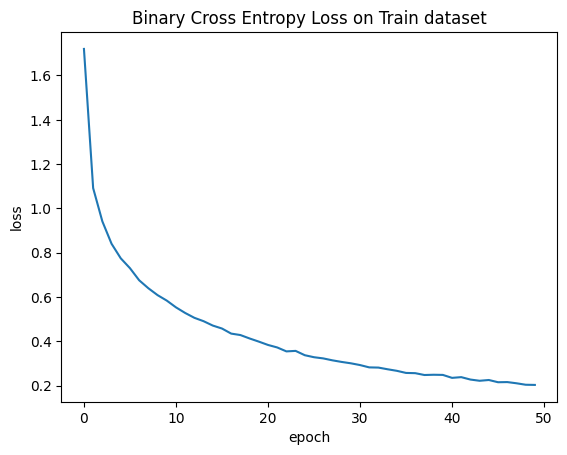

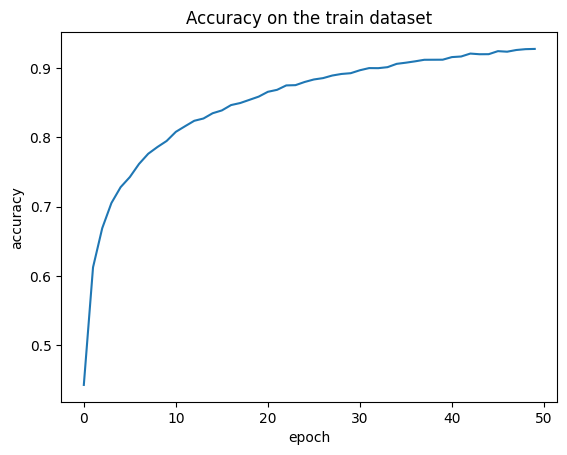

In [59]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

## Step 5: Evaluate model
We can evaluate our model on validation dataset using the `evaluate()` function. This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy that we set before.

In [60]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.5565
Loss :  0.5625400543212891
Accuracy :  0.8508999943733215


In [61]:
prediction = model.predict([x_test])[:6]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [62]:
import numpy as np
pr = [np.argmax(i)for i in prediction]

In [63]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipykernel_36/2946128912.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[i][j].set_title(f'Real: {class_names[int(y_test[i*3+j])]} Predicted: {class_names[int(pr[i*3+j])]}')


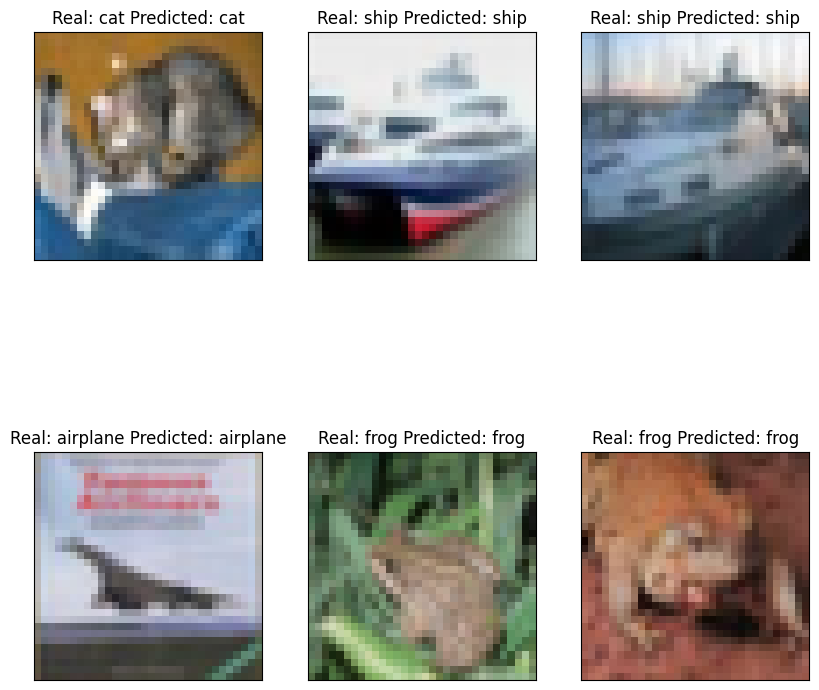

In [65]:
fig, axs = plt.subplots(2, 3, figsize=(10,10))

for i in range(2):
    for j in range(3):
        axs[i][j].imshow(x_test[i*3+j])
        axs[i][j].set_title(f'Real: {class_names[int(y_test[i*3+j])]} Predicted: {class_names[int(pr[i*3+j])]}')
        axs[i][j].set_xticks([])  
        axs[i][j].set_yticks([])

plt.show()